In [1]:
import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [34]:
df = pd.read_excel("C:\\Users\\n243710\Downloads/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [35]:
online = df[df.CustomerID.notnull()]

In [36]:
online['InvoiceDay'] = online.InvoiceDate.apply(lambda x: dt.datetime(x.year,x.month,x.day))
online.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [37]:
online['CohortDay'] = online.groupby('CustomerID')['InvoiceDay'].transform('min')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
online.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,2011-08-18
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,2011-08-18
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,2011-08-18
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,2011-08-18
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09,2011-08-18


In [39]:
def get_day_int(df,col):
    year = df[col].dt.year
    month = df[col].dt.month
    day = df[col].dt.day
    return year,month,day

invoice_year,invoice_month,invoice_day = get_day_int(online,'InvoiceDay')
#cohort_year,cohort_month,cohort_day = get_day_int(online,'Cohortday')

In [40]:
cohort_year,cohort_month,cohort_day = get_day_int(online,'CohortDay')

In [41]:
diff = (invoice_year - cohort_year) *365 + (invoice_month - cohort_month)*30 +invoice_day-cohort_day +1

In [42]:
online['CohortIndex'] = diff

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
online['CohortIndex'] = np.ceil(np.divide(online['CohortIndex'],30)).astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
online.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,2011-08-18,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,2011-08-18,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,2011-08-18,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,2011-08-18,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09,2011-08-18,4


In [54]:
online['CohortMonth'] = online.CohortDay + pd.offsets.MonthBegin(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
online.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,2011-08-18,4,2011-09-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,2011-08-18,4,2011-09-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,2011-08-18,4,2011-09-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,2011-08-18,4,2011-09-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09,2011-08-18,4,2011-09-01


In [56]:
type(online)

pandas.core.frame.DataFrame

In [65]:
cohortdata = online.groupby(['CohortMonth','CohortIndex'])['CustomerID'].apply(pd.Series.nunique)

In [66]:
type(cohortdata)

pandas.core.series.Series

In [67]:
cohort_data = cohortdata.to_frame()

In [69]:
cohorttable = cohort_data.pivot_table(index = 'CohortMonth',columns = 'CohortIndex',values = 'CustomerID')

In [70]:
cohorttable

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2011-01-01,948.0,363.0,327.0,365.0,344.0,370.0,351.0,336.0,331.0,363.0,385.0,481.0,187.0
2011-02-01,421.0,104.0,122.0,128.0,127.0,122.0,108.0,116.0,142.0,148.0,120.0,6.0,NaN
2011-03-01,380.0,89.0,91.0,112.0,79.0,102.0,97.0,106.0,110.0,95.0,3.0,NaN,NaN
2011-04-01,440.0,82.0,110.0,102.0,86.0,97.0,107.0,119.0,96.0,11.0,NaN,NaN,NaN
2011-05-01,299.0,82.0,53.0,67.0,55.0,71.0,74.0,68.0,7.0,NaN,NaN,NaN,NaN
2011-06-01,279.0,55.0,44.0,58.0,71.0,65.0,69.0,3.0,NaN,NaN,NaN,NaN,NaN
2011-07-01,235.0,39.0,51.0,58.0,67.0,67.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,191.0,35.0,41.0,45.0,44.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,167.0,38.0,49.0,39.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
base = cohorttable[1]

In [72]:
retention = cohorttable.divide(base,axis = 0).round(2)

In [74]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2011-01-01,1.0,0.38,0.34,0.39,0.36,0.39,0.37,0.35,0.35,0.38,0.41,0.51,0.2
2011-02-01,1.0,0.25,0.29,0.30,0.30,0.29,0.26,0.28,0.34,0.35,0.29,0.01,NaN
2011-03-01,1.0,0.23,0.24,0.29,0.21,0.27,0.26,0.28,0.29,0.25,0.01,NaN,NaN
2011-04-01,1.0,0.19,0.25,0.23,0.20,0.22,0.24,0.27,0.22,0.02,NaN,NaN,NaN
2011-05-01,1.0,0.27,0.18,0.22,0.18,0.24,0.25,0.23,0.02,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.20,0.16,0.21,0.25,0.23,0.25,0.01,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.17,0.22,0.25,0.29,0.29,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.18,0.21,0.24,0.23,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,1.0,0.23,0.29,0.23,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


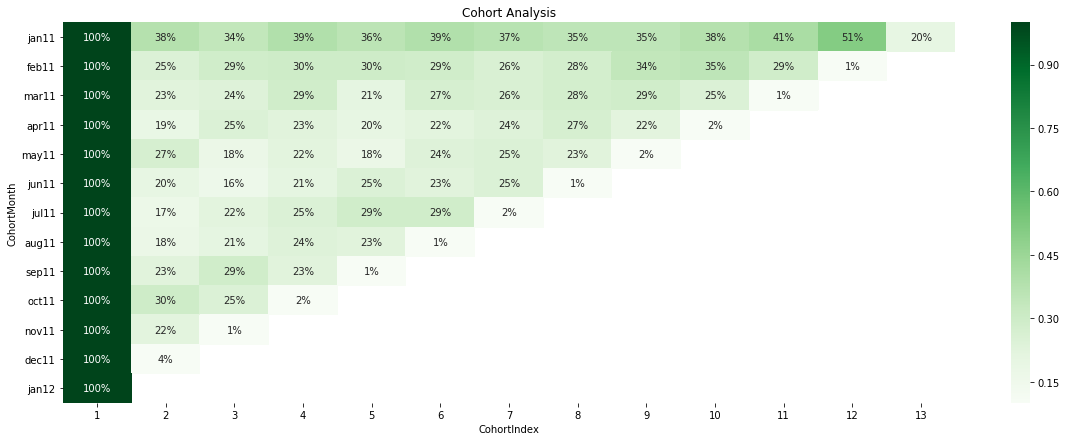

In [79]:
plt.figure(figsize= (20,7))
plt.title('Cohort Analysis')
sns.heatmap(data = retention, cmap = 'Greens',annot=True,fmt = '.0%', yticklabels = ['jan11','feb11','mar11','apr11','may11','jun11',
                                                                             'jul11','aug11','sep11','oct11','nov11','dec11'
                                                                             ,'jan12'], vmin = 0.1)
plt.show()